### In this notebook I have build a multiple linear regression model for the prediction of demand for shared bikes.For Above I have done all process Sequentially.

## STEP 1: Data understanding, preparation and EDA


In [308]:
#importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Below import  will eliminate  Warning alert messages

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data


In [309]:
#Read the data from csv file
Bike_Data = pd.read_csv('day.csv')

In [310]:
# Checking top 5 rows of the dataset
Bike_Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [311]:
#checking the shape of dataset and information about the columns.
Bike_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


So from above observation we found out that dataset has 16 rows and 730 Columns. Now we will check the descriptive statistics summary of all colums.

In [312]:
Bike_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [313]:
# checking for the null values in column data
Bike_Data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From the above observation we can say that the dataset has no null values in it

In [314]:
#For better readability and understanding we will rename the complex columname with easy one
Bike_Data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [315]:
Bike_Data.rename(columns={'yr':'year','mnth':'month','hum':'humidity','dteday':'date'}, inplace=True)
Bike_Data.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Now our main task is to drop unnecessary columns which are not able to contribute significantly in our model building.

In Above dataset:
###### -> instant has only index for the row
###### -> date which is not useful as year and month column are already present which are more meaningful,
###### -> casual and registered columns are subset by category for cnt column so they are also not required.

In [316]:
Bike_Data.drop(['instant','date','casual','registered'],axis=1,inplace=True)

#### Now we will handle Categorical variables. i.e, converting feature values into categorical string values

In [317]:
# Handling season column

Bike_Data.season = Bike_Data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [318]:
# Handling the week column

Bike_Data.weekday = Bike_Data.weekday.map({0:'sun',1:'mon',2:'tues',3:'wednes',4:'thurs',5:'fri',6:'sat'})

In [319]:
# Handling the month column

Bike_Data.month = Bike_Data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [320]:
# Handling the weathersit column

Bike_Data.weathersit = Bike_Data.weathersit.map({1:'Clear',2:'Misty',3:'Snowy',4:'Stromy'})

In [321]:
#Checking columns and rows of data after modification, checking first 10 Rows:

Bike_Data.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednes,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thurs,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


So, From above observation we can see that we perfectly handled categorical variables


### Now we will visualize data to gain more insight from it



Visualizing the data is an important step in the bike-sharing demand forecasting process. It can help identify patterns and trends that may not be immediately apparent from raw data. And also to see how predictor variable stands against the target variable.

<Figure size 1000x400 with 0 Axes>

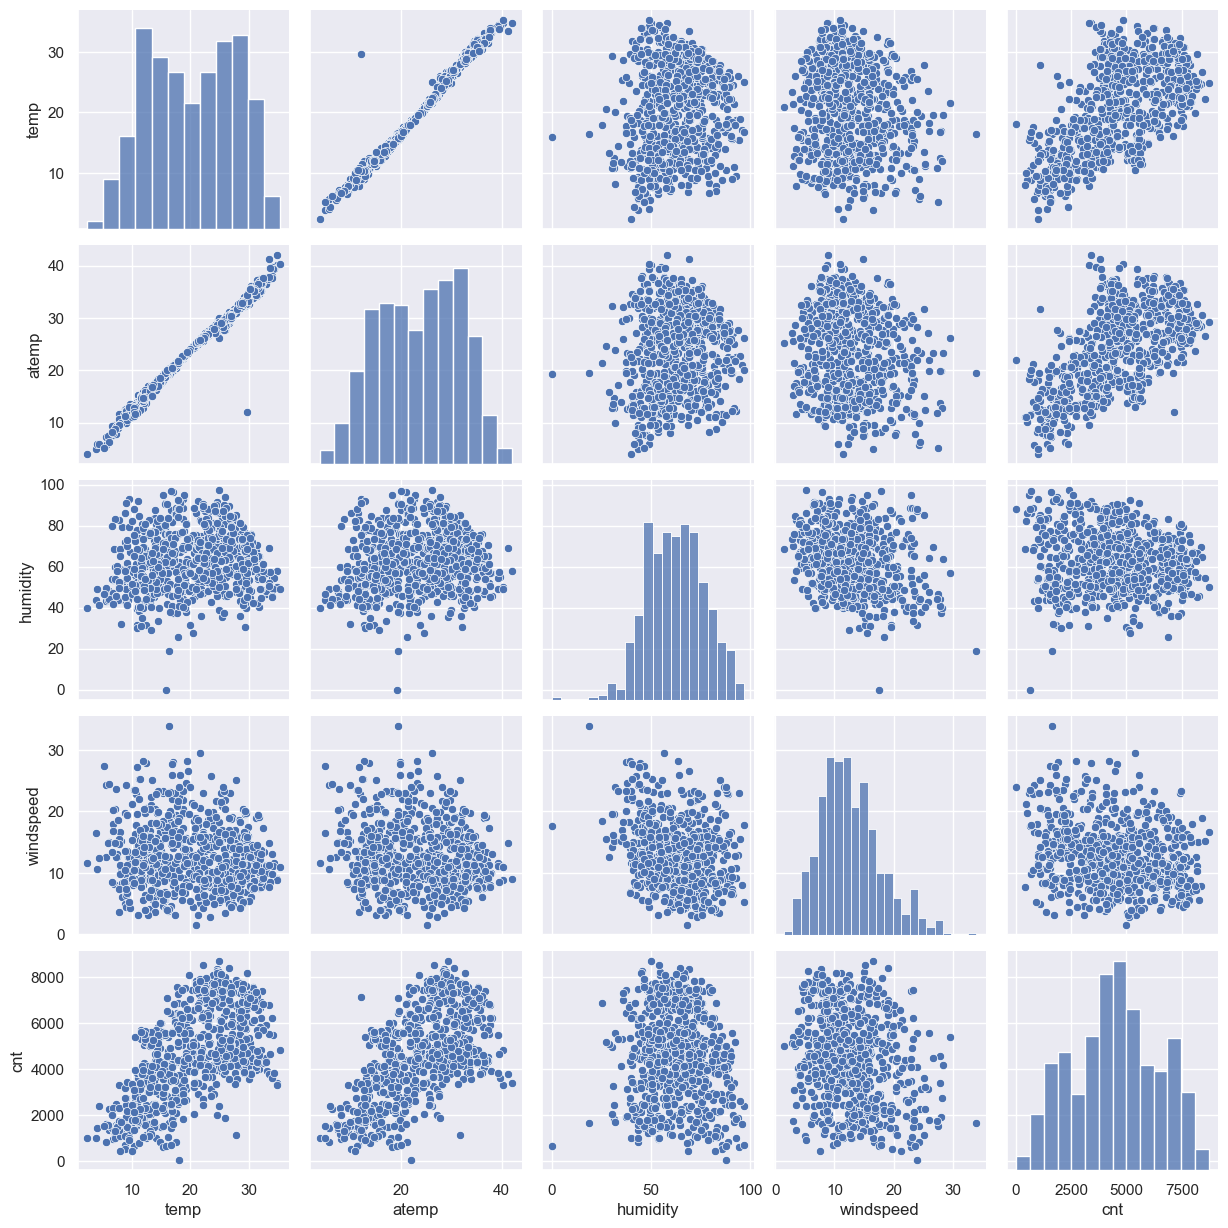

In [322]:
#Plotting pairplot of all the numeric variables
plt.figure(figsize=(10,4))
sns.pairplot(Bike_Data[["temp","atemp","humidity","windspeed","cnt"]])
plt.show()

Understand the distribution of numerical variables and generate a frequency table for numeric variables

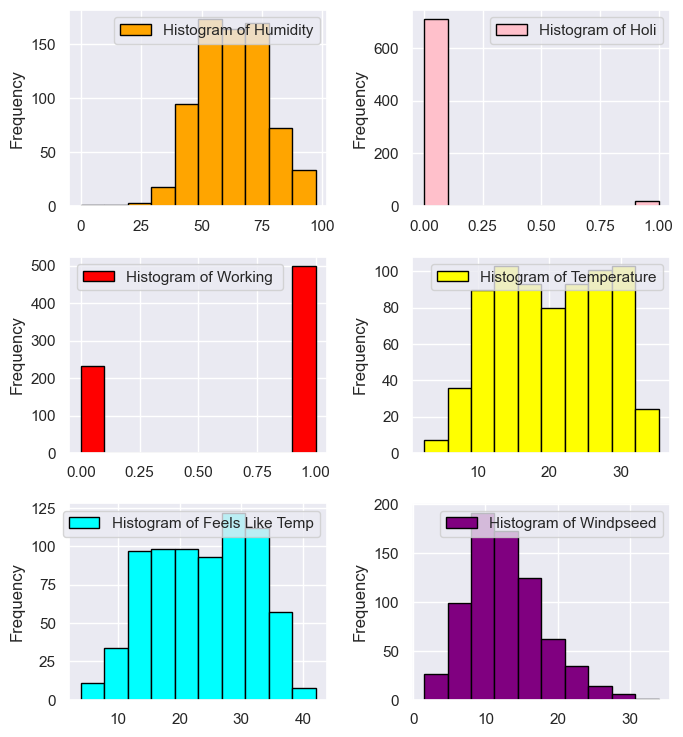

In [323]:
plt.figure(figsize=(7,10))
plt.subplot(423)
Bike_Data['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
Bike_Data['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holi', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
Bike_Data['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working ', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
Bike_Data['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
Bike_Data['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
Bike_Data['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout()

### Observations:

#### Few inferences can be drawn by looking at the these histograms:

##### -> Variables temp, atemp, humidity and windspeed looks naturally distributed.

##### -> As expected, mostly working s and variable holi is also showing a similar inference

### visualizing the categorical columns

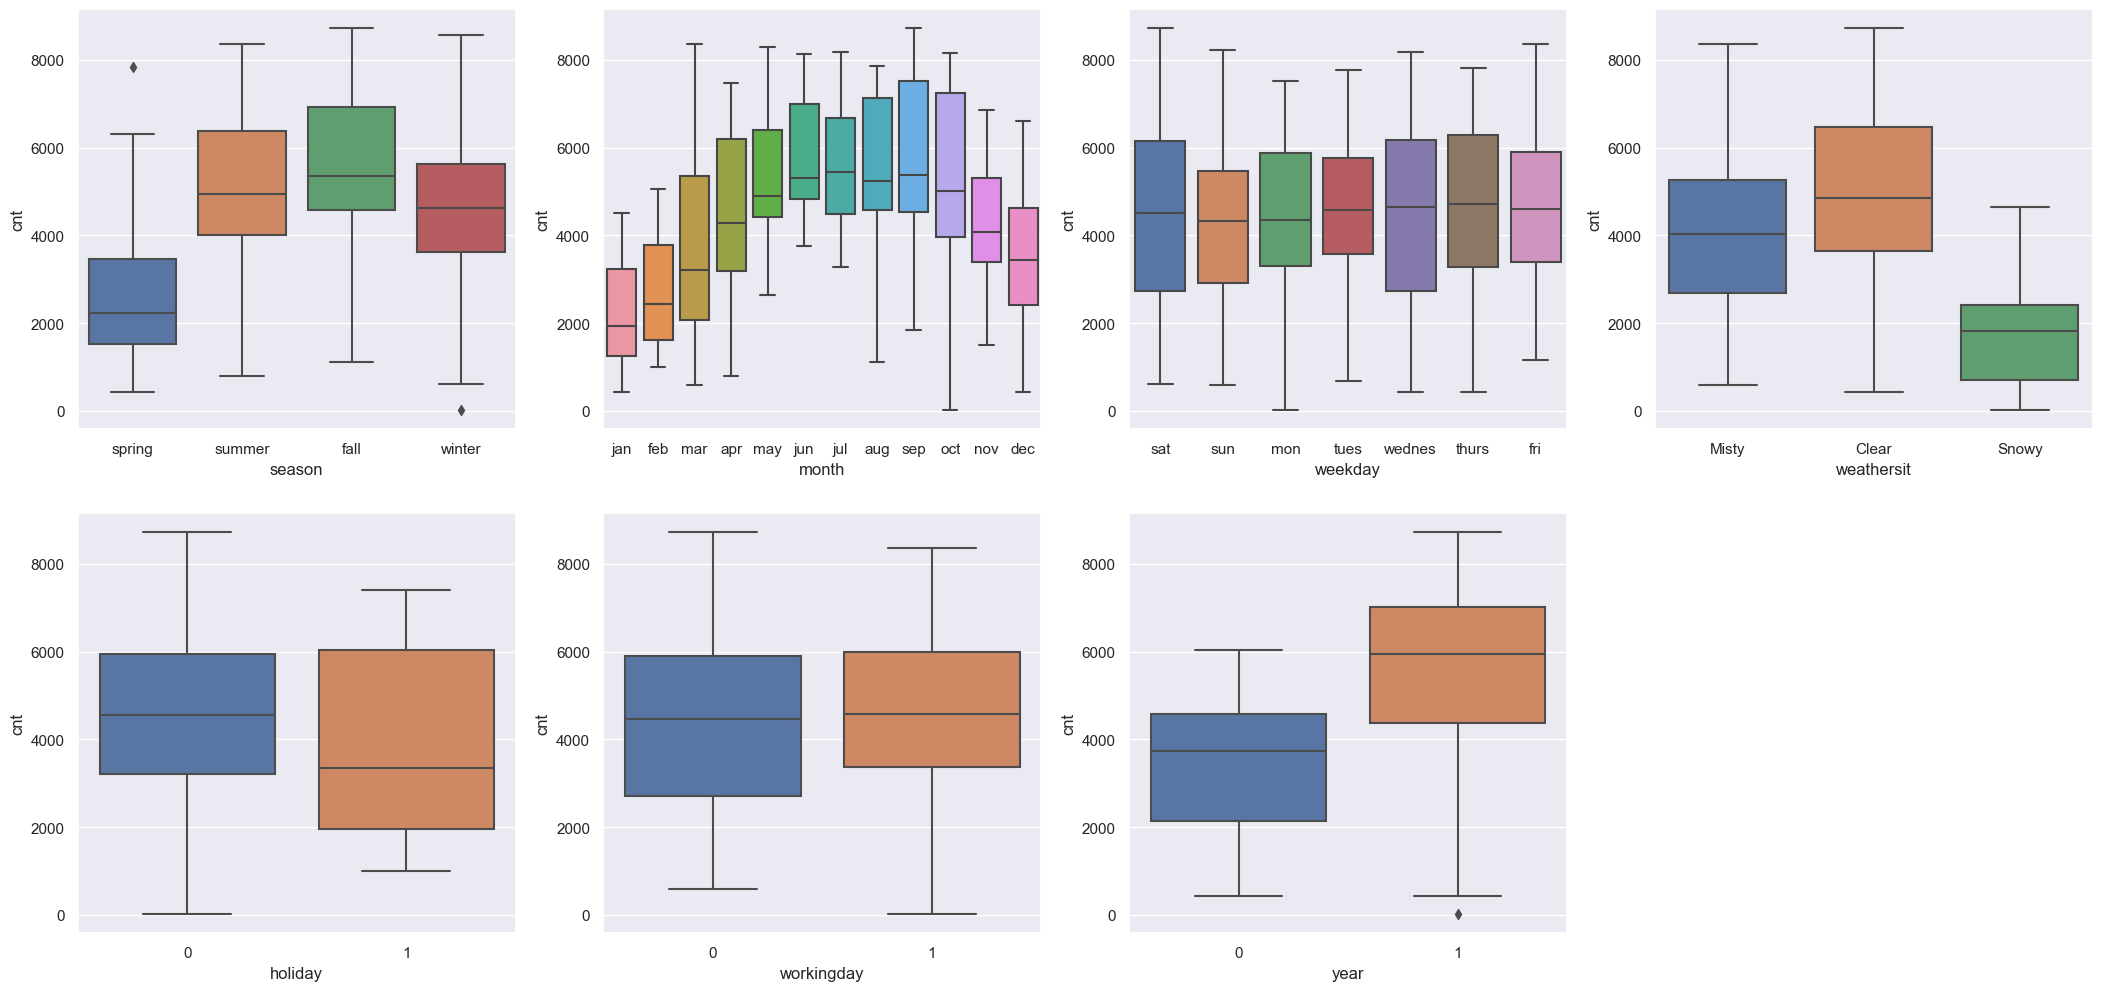

In [324]:
plt.figure(figsize=(26, 12))
plt.subplot(2,4,1)
sns.set(style="darkgrid")
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Data)
plt.subplot(2,4,2)
sns.boxplot(x ='month', y = 'cnt', data = Bike_Data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = Bike_Data)
plt.show()


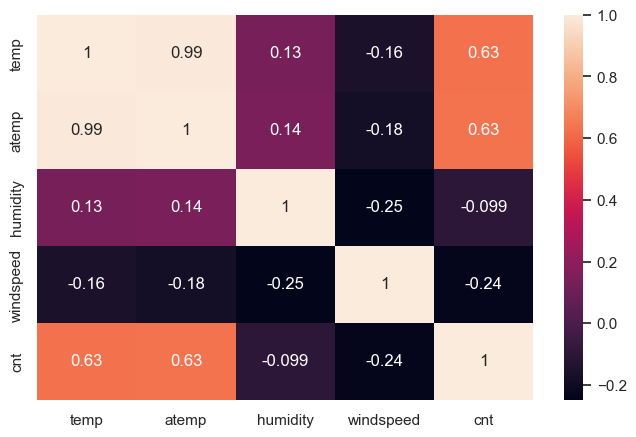

In [325]:
#Plotting correlation heatmap to analyze the linearity between the variables in the dataframe 

plt.figure(figsize = (8, 5))
sns.heatmap(Bike_Data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True)
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity.

In [326]:
#Dropping column temp since it is very highly collinear with the column atemp.
#Further,the column atemp is more appropriate for modelling compared to column temp from human perspective.

Bike_Data.drop(columns=["temp"],axis=1,inplace =True)
Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednes,1,Clear,11.46350,43.6957,12.522300,1600


In [327]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(Bike_Data.month,drop_first=True)
weekdays_df=pd.get_dummies(Bike_Data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(Bike_Data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(Bike_Data.season,drop_first=True)

In [328]:
# Merging  the dataframe, with the dummy variable dataset. 

Bike_Data_New = pd.concat([Bike_Data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
Bike_Data_New.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,...,sat,sun,thurs,tues,wednes,Misty,Snowy,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,...,1,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,...,0,1,0,0,0,1,0,1,0,0
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tues,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wednes,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [329]:
Bike_Data_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  jul         730 non-null    uint8  
 16  jun         730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

So no null values are there, we are good here!

In [330]:
# dropping unnecessary columns as we have already created dummy variable out of it.

Bike_Data_New.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

Bike_Data_New.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thurs,tues,wednes,Misty,Snowy,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## STEP 2: Model building and evaluation 

 Splitting the Data into Training and Testing Sets

In [331]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(Bike_Data_New, train_size = 0.7, random_state = 100)

# check the shape of training datatset

df_train.shape

(510, 29)

Above section splits the data into training and testing sets. 70% of the data is used for training the model, and the remaining 30% is used for testing.

In [332]:
# check the shape of testing datatset

df_test.shape

(220, 29)

In [333]:
# Using MinMaxScaler to Rescaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thurs,tues,wednes,Misty,Snowy,spring,summer,winter
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Above section rescales the features using MinMaxScaler. Above ensures that all features have the same scale, which is important for many machine learning algorithms.

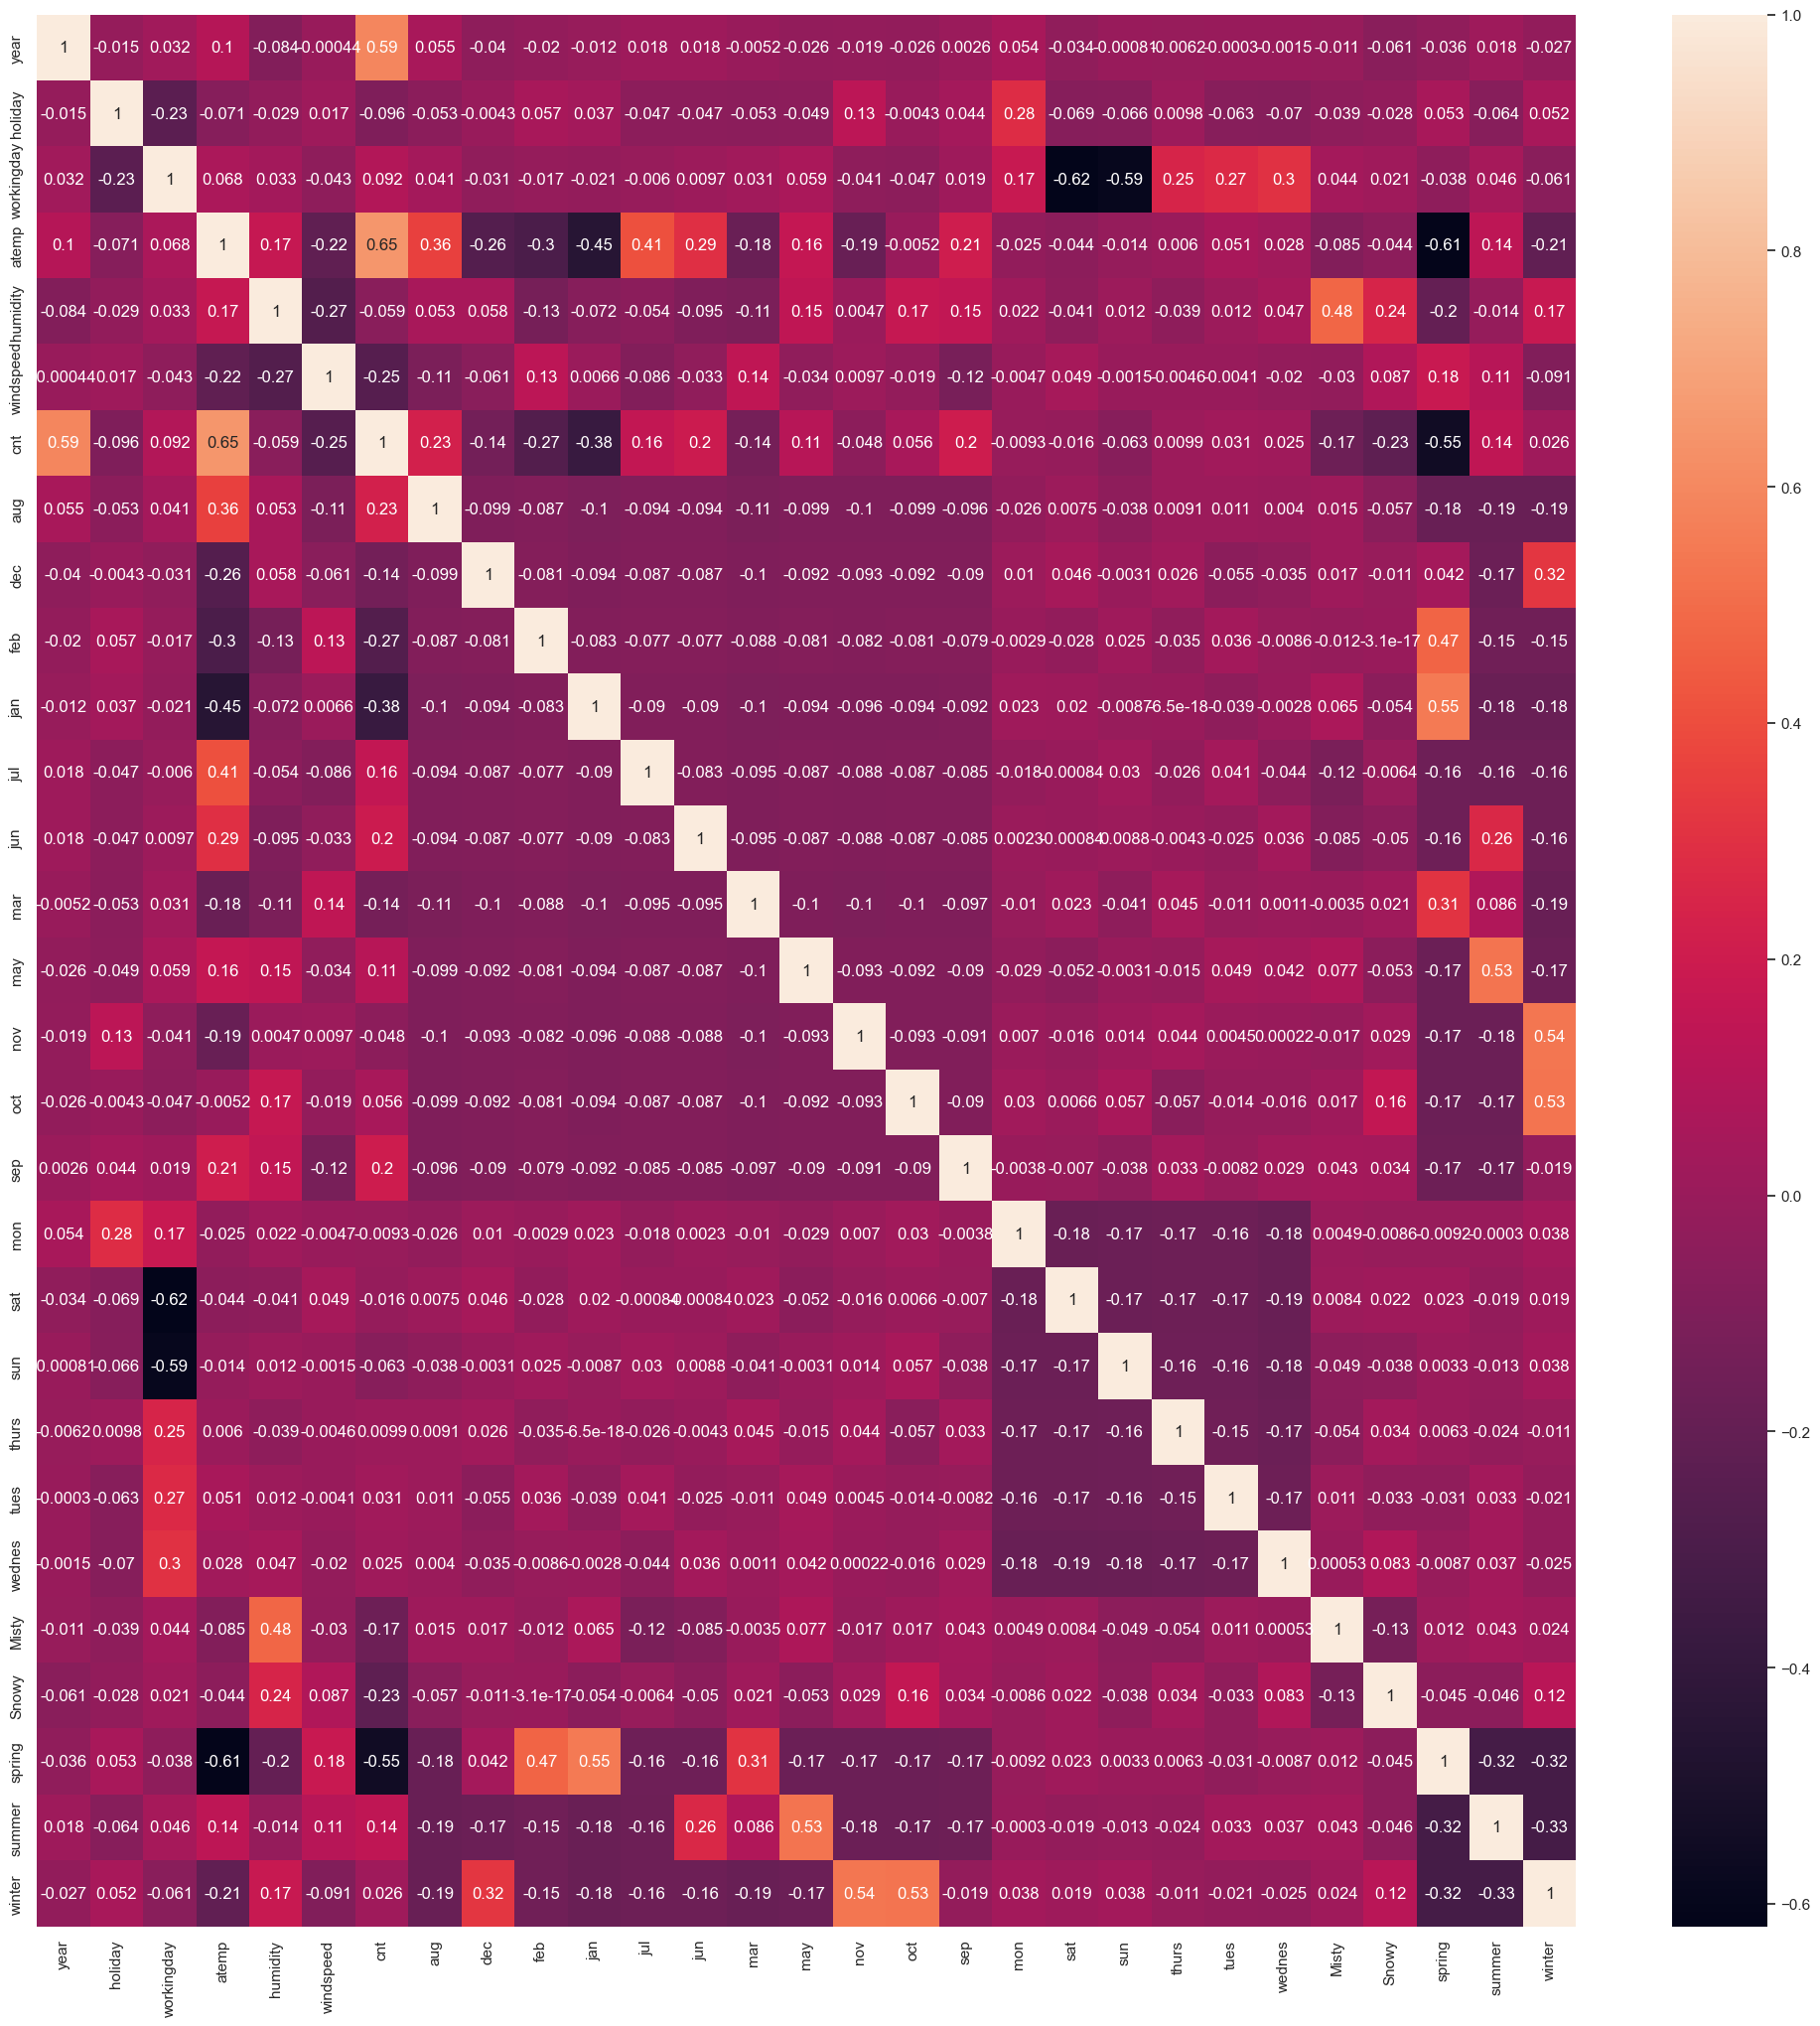

In [334]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True,)
plt.show()

#Above section visualizes the correlation coefficients between variables using a heatmap. 
# Above helps to understand the relationships between different variables.

### Observation:

#### 1. cnt seems to have correlation with year variable and atemp.
#### 2. Similarly, Misty and humidity show correlation.
#### 3. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [335]:
# Building the Linear Model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

y_train = df_train.pop('cnt')
X_train = df_train


Above section builds the linear regression model. It uses Recursive Feature Elimination (RFE) to select the most important features. The LinearRegression model is fitted with the training data, and the RFE is fitted with the model and the training data.

In [336]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,step=14)
rfe = rfe.fit(X_train, y_train)

In [337]:
#List of variables selected in top 14 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thurs', False, 2),
 ('tues', False, 2),
 ('wednes', False, 2),
 ('Misty', True, 1),
 ('Snowy', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [338]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'aug', 'dec',
       'jan', 'nov', 'sep', 'Misty', 'Snowy', 'spring', 'winter'],
      dtype='object')


Above section prints the columns that were selected by RFE and those that were not.

In [339]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'feb', 'jul', 'jun', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thurs', 'tues', 'wednes', 'summer'],
      dtype='object')

In [340]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

Above section calculates the Variance Inflation Factor (VIF) for each variable. VIF is a measure of multicollinearity in the data. High VIF values indicate high multicollinearity.

In [341]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,24.13
2,atemp,15.15
4,windspeed,4.00
13,winter,2.99
12,spring,2.90
10,Misty,2.27
0,year,2.06
8,nov,1.83
7,jan,1.73
6,dec,1.54


humidity shows high VIF value.The higher the possibility that multicollinearity exists, and further research is required. 

In [342]:
# Building 1st linear regression model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.8
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          9.63e-184
Time:                        19:34:09   Log-Likelihood:                 499.35
No. Observations:                 510   AIC:                            -968.7
Df Residuals:                     495   BIC:                            -905.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3815      0.032     11.756      0.0

Above section builds the first linear regression model using the statsmodels library. The summary of the model is printed, which includes information about the coefficients of the model, the standard errors, and the p-values.

In [343]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.37
3,windspeed,3.94
12,winter,2.58
11,spring,2.36
0,year,2.05
7,nov,1.81
6,jan,1.65
9,Misty,1.52
5,dec,1.46
4,aug,1.35


VIF values seems to be good now. But we will see if we can reduce further

In [344]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          3.12e-182
Time:                        19:34:09   Log-Likelihood:                 493.02
No. Observations:                 510   AIC:                            -958.0
Df Residuals:                     496   BIC:                            -898.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3102      0.026     12.077      0.0

Above section builds the second linear regression model after dropping the ‘humidity’ column. The summary of the new model is printed.

In [345]:
# We can drop aug variable as it has high p-value
X_train_new = X_train_new.drop(['aug'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,3.90
2,atemp,3.74
11,winter,2.52
10,spring,2.34
0,year,2.05
6,nov,1.81
5,jan,1.64
8,Misty,1.52
4,dec,1.46
7,sep,1.17


Above section drops the ‘aug’ column because it has a high p-value, indicating that it is not a significant predictor. The VIF is recalculated for the remaining variables.

VIF value now seems to be good as it came below 4.

In [346]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          3.12e-183
Time:                        19:34:09   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -959.3
Df Residuals:                     497   BIC:                            -904.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3090      0.026     12.050      0.0

Above section builds the third linear regression model after dropping the ‘aug’ column. The summary of the new model is printed.

#### We can cosider the above model i.e lr_3, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.


#### F-Statistics value of 204.0 (which is greater than 1), states that the overall model is significant

In [347]:
# Checking the parameters and their coefficient values
lr_3.params

const        0.308958
year         0.236970
holiday     -0.086379
atemp        0.370044
windspeed   -0.140703
dec         -0.056202
jan         -0.062386
nov         -0.051954
sep          0.064992
Misty       -0.078152
Snowy       -0.292984
spring      -0.113379
winter       0.057935
dtype: float64

Above section prints the parameters of the final model and their coefficient values.

In [348]:
y_train_pred = lr_3.predict(X_train_lm_3)

Above section uses the final model to make predictions on the training data.

Residual Analysis of the train data and validation

Text(0.5, 0, 'Errors')

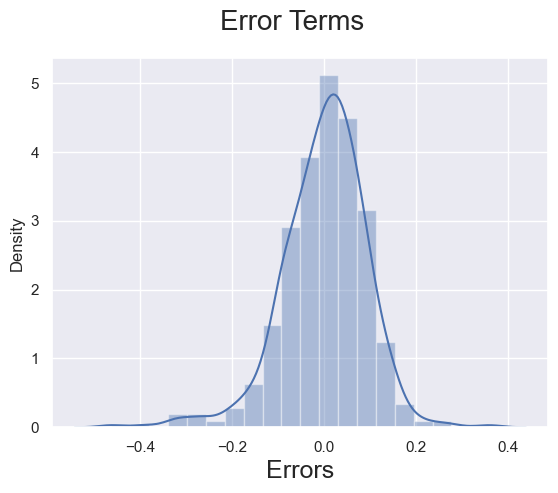

In [349]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In above section performs residual analysis of the train data. It plots a histogram of the error terms (the difference between the actual and predicted values). The error terms should ideally follow a normal distribution.


#### Now checking multicolinearity

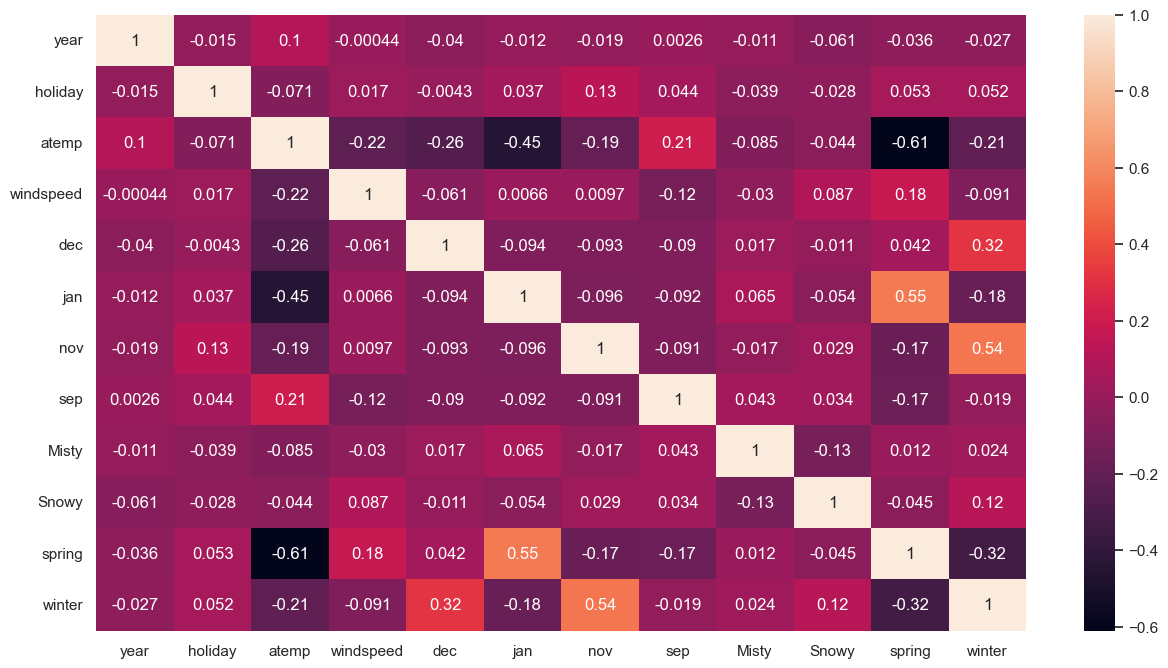

In [350]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

Above section checks for multicollinearity among the predictors by plotting a heatmap of their correlation coefficients. If there is high multicollinearity, it may affect the stability of the model.

There is no multicolinearity as seen from the heatmap.

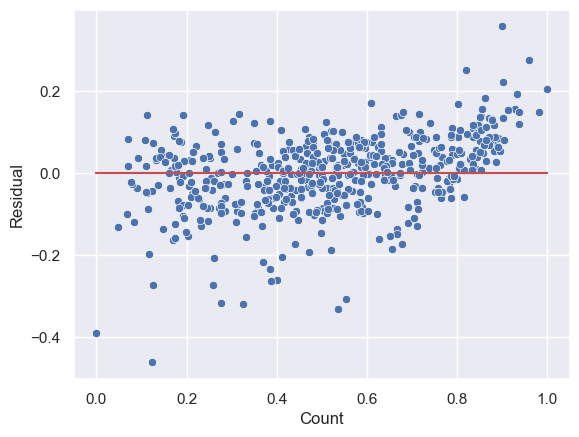

In [351]:
# Checking Homoccedicity

y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y= residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Above section checks for homoscedasticity, which is the assumption that the variance of the errors is constant across all levels of the independent variables. It plots the residuals against the predicted values. If there is a visible pattern in the plot, it indicates heteroscedasticity, violating the assumption of homoscedasticity.

No visible pattern observed from above plot for residuals.

#### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [352]:
# Applying scaling on the test dataset

num_vars = ['atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thurs,tues,wednes,Misty,Snowy,spring,summer,winter
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Above section applies the same scaling that was applied to the training data to the test data. This is important to ensure that the model makes predictions on the same scale as the training data.

In [353]:
from sklearn.metrics import r2_score
y_test = df_test.pop('cnt')
X_test = df_test

col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_3 = sm.add_constant(X_test)
y_pred = lr_3.predict(X_test_lm_3)

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8164

This section prepares the test data for prediction. It separates the target variable (‘cnt’) from the test data and selects the same columns in X_test as in X_train_new. Also,section adds a constant to the test data, makes predictions using the final model, and calculates the R-squared score.

#### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

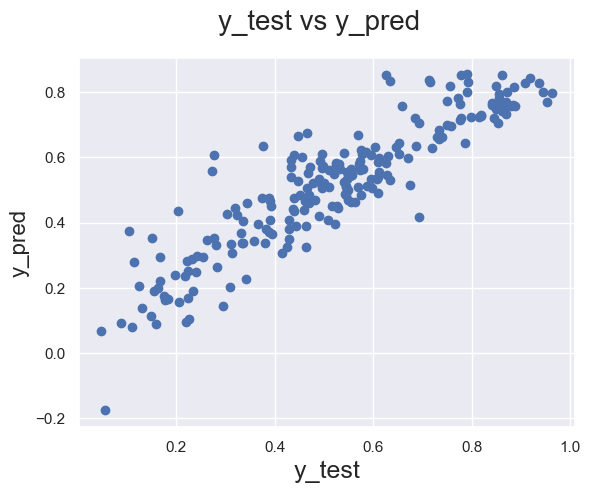

In [354]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

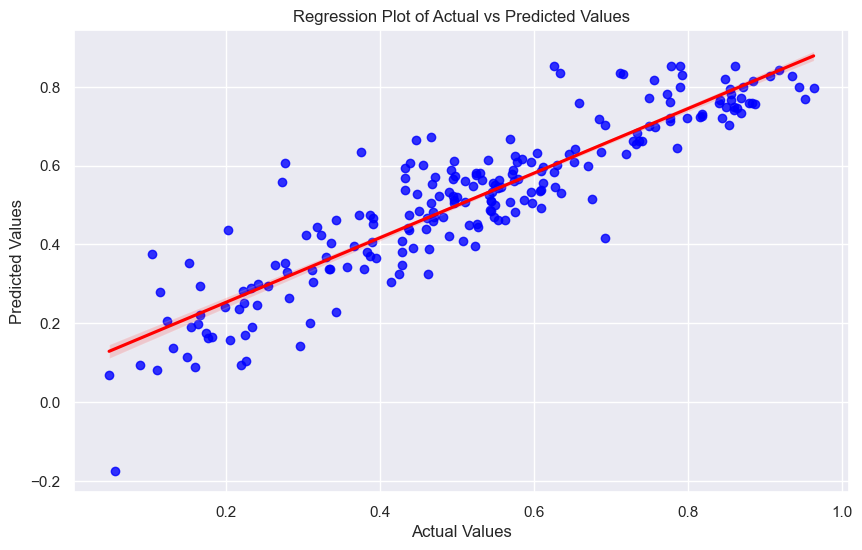

In [360]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Above section plots the actual test values against the predicted values. This helps to visualize how well the model’s predictions match the actual values.

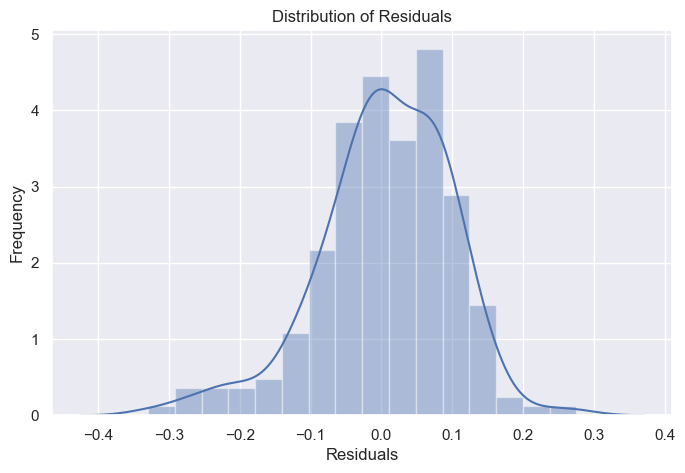

In [359]:
# Plot the residuals
plt.figure(figsize=(8,5))
residuals = y_test - y_pred
sns.distplot(residuals)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [363]:
import plotly.graph_objects as go

# Calculate the residuals
residuals = y_test - y_pred

# Create an interactive scatter plot of residuals
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=y_test, y=residuals, mode='markers'))
fig1.update_layout(title='Residuals vs Predicted Values',
                   xaxis_title='Predicted Values',
                   yaxis_title='Residuals')
fig1.show()

# Create an interactive line plot of actual vs predicted values
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=y_test, y=y_pred, mode='lines+markers', name='Predicted'))
fig2.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Actual'))
fig2.update_layout(title='Actual vs Predicted Values',
                   xaxis_title='Actual Values',
                   yaxis_title='Predicted Values')
fig2.show()


In [355]:
round(lr_3.params,4)

const        0.3090
year         0.2370
holiday     -0.0864
atemp        0.3700
windspeed   -0.1407
dec         -0.0562
jan         -0.0624
nov         -0.0520
sep          0.0650
Misty       -0.0782
Snowy       -0.2930
spring      -0.1134
winter       0.0579
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.3090 + 0.2370  \times  year - 0.0864  \times  holiday + 0.3700 \times atemp - 0.1407 \times windspeed - 0.0562 \times dec - 0.0624 \times jan - 0.0520 \times nov +  0.0650 \times sep  - 0.0782 \times Misty - 0.2930 \times Snowy- 0.1134 \times spring + 0.0579 \times winter $

In [356]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8058


Above section calculates the adjusted R-squared value for the test data. The adjusted R-squared takes into account the number of predictors in the model and can sometimes provide a more accurate measure of the model’s performance.

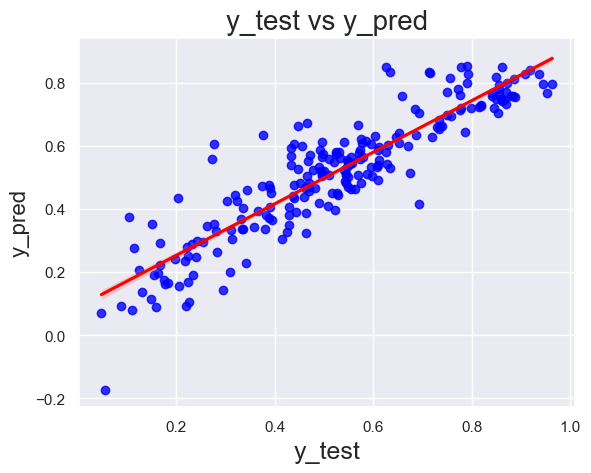

In [357]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Above section plots a regression plot of the actual test values against the predicted values. This provides another visualization of the model’s performance on the test data.

# Comparision between Training and Testing dataset:
     Train dataset R^2          : 0.831
     Test dataset R^2           : 0.8164
     Train dataset Adjusted R^2 : 0.827    
     Test dataset Adjusted R^2  : 0.8058

#### Demand of bikes depend on year, holiday, atemp, windspeed,dec,jan,nov, sep,Snowy, Misty, spring and winter.

So atlast we compares the R-squared and adjusted R-squared values for the training and testing datasets. It also presents the final equation of the best-fitted line, which includes the coefficients of the predictors. The demand for bikes is found to depend on several factors, including the year, holiday, atemp, windspeed, and various months and weather situations. The model’s performance on both the training and testing datasets is quite good, indicating that it generalizes well to new data. The model can now be used to make predictions about bike sharing demand based on these factors. The model’s simplicity and interpretability make it a valuable tool for understanding and predicting bike sharing demand. The model’s robustness and reliability provide confidence in its predictions, making it a valuable tool for decision-making in the bike sharing business. The model’s ability to handle a range of predictor variables makes it a flexible and versatile tool for analyzing and predicting bike sharing demand. The model’s predictive accuracy, combined with its interpretability and robustness, make it a powerful tool for understanding and predicting bike sharing demand.